In [1]:
import scanpy as sc
import pandas as pd

In [66]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [67]:
adata = adata[:, adata.var["modality"]=="GEX"].copy()

In [68]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [69]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

In [70]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [71]:
adata = adata[adata.obs["celltype"].isin(["Delta", "Fev+ Delta", "Eps. progenitors", "Epsilon"])].copy()

In [72]:
eps_markers_raw=["GHRL",
"CLEC4G",
"ACSL1",
"BHMT",
"CLEC4GP1",
"CDHR3",
"ACOT7",
"VSTM2L",
"CHL1",
"OLFML3",
"HMP19",
"VTN", #TF
"CNNM1",
"FGF12",
"WNK3",
"THSD4",
"PKIB",
"DIRAS3",
"IL1RAP",
"S100A6",
"NPSR1-AS1",
"SPTSSB",
"ASAH1",
"PHGR1",
"PDE8B",
"WSB1",
"FSTL5",
"CRY2",
"C12orf75",
"ASGR1",
"FLRT3",
"RAPGEF4",
"PROX1", #TF
"ENPP1",
"EFNB3",
"AK5",
"DOCK8",
"MVB12B",
"PTP4A1",
"HEPACAM2",
"NPHP4",
"KCTD12",
"IQCA1",
"GATA6-AS1",
"FGF14",
"NIPSNAP1",
"RP11-384L8.1",
"ELL2",
"NKX2-2", #TF
"DIRAS2",
"LINC00261",
"PCBP4",
"LRRFIP1",
"TNFRSF21",
"PAPSS1",
"REV3L",
"TPST2",
"GDAP1L1",
"DST",
"MT1F",
"SERPINB6",
"CXADR",
"DPP10",
"CD47",
"PFKL",
"TPST1",
"BLMH",
"PROM1",
"ATF7IP2",
"GATA6", #TF
"TMEM59L",
"GPRIN3",
"TMED8",
"RTN1",
"CALD1",
"TAC3",
"GPR160",
"FFAR4",
"GADD45A",
"FUT8",
"SCN3A",
"EPHA4",
"SPATS2L",
"TCEAL2",
"RGS17",
"PPL",
"MSL3",
"ANKRD36C",
"ARSA",
"CMTM8",
"RAP2B",
"FAM110B",
"SEC61A1",
"ITGB8",
"WFDC2",
"PHF20L1",
"CTSF",
"RFX2", #TF
"SLC12A5",
"GMDS",
"CDCP1",
"LINC00936",
"PRUNE2",
"PDLIM7",
"C10orf10",
"ANKRD36B",
"FLNB"]

In [73]:
eps_markers = [s[0] + s[1:].lower() for s in eps_markers_raw]

In [74]:
eps_markers_present = list(set(eps_markers).intersection(adata.var_names))
adata = adata[:, eps_markers_present].copy()

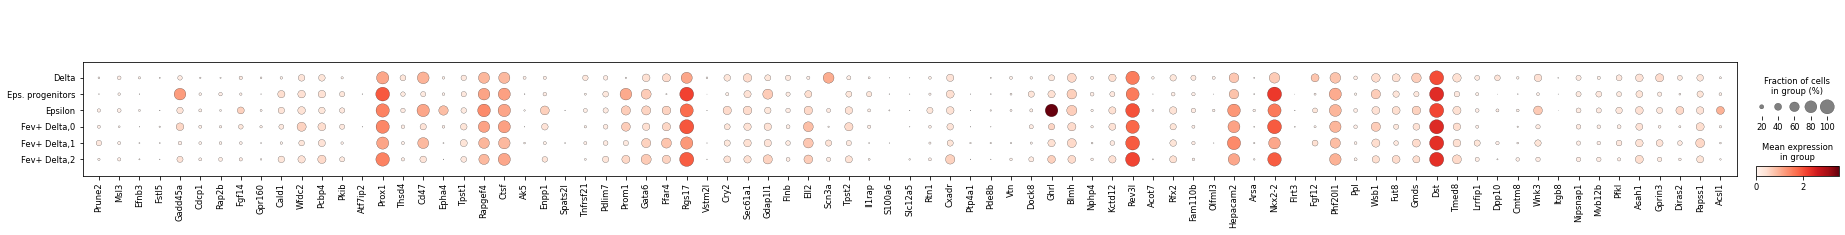

In [75]:
sc.pl.dotplot(adata, eps_markers_present, groupby='Fev_delta_refinement')

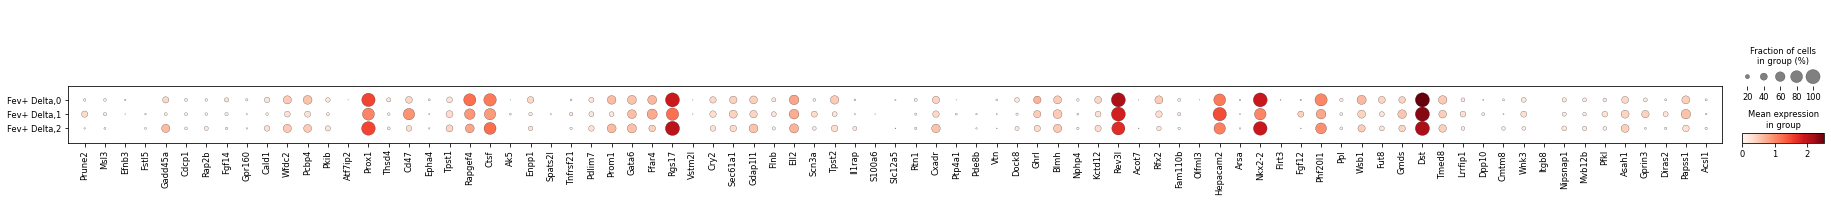

In [61]:
adata_red = adata[~adata.obs['Fev_delta_refinement_gex'].isin(["Fev+ Delta,3", "Fev+ Delta,4"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_markers_present, groupby='Fev_delta_refinement_gex')

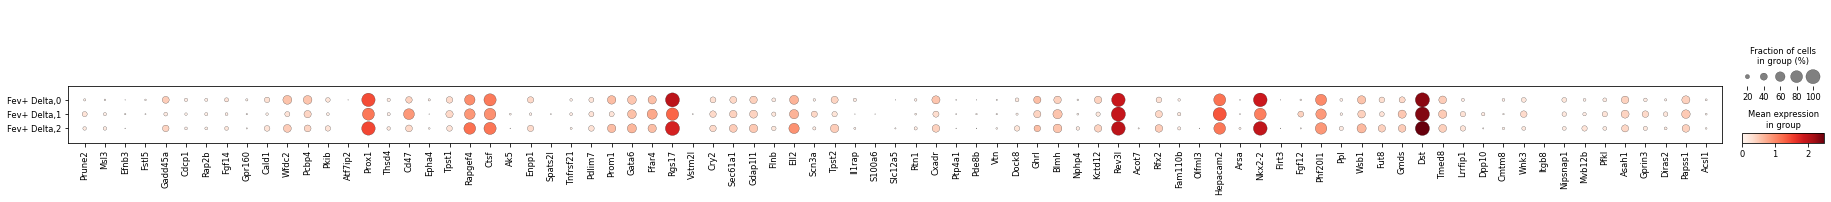

In [62]:
adata_red = adata[~adata.obs['Fev_delta_refinement_atac'].isin(["Fev+ Delta,3"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_markers_present, groupby='Fev_delta_refinement_atac')